In [2]:
# This cell is handling all the importing of libraries and tools
# imports tensorflow and tf.keras
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

Tensorflow Version: 2.7.0
Keras Version: 2.7.0


In [3]:
# import NIST data base for hand written digits
# Print the shapes of data as loaded 
# then reshape to the data to flatten from 2 dimension (28,28) to 1 dimension (28*28)
# 
# X_train - array of gray scale image data with shapes containing traning data
# y_train - array of digit labels with shape for training data
# x_test - greyscale image data, test data
# y_test - digit labels, for test data

from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)


Xtrain = Xtrain.reshape(len(Xtrain), 28*28)
Xtest = Xtest.reshape(len(Xtest), 28*28)

print('Xtrain', type(Xtrain), Xtrain.shape)
print('Xtest', type(Xtest), Xtest.shape)
print('ytrain', type(ytrain), ytrain.shape)
print('ytest', type(ytest), ytest.shape)



Xtrain <class 'numpy.ndarray'> (60000, 28, 28)
Xtest <class 'numpy.ndarray'> (10000, 28, 28)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)
Xtrain <class 'numpy.ndarray'> (60000, 784)
Xtest <class 'numpy.ndarray'> (10000, 784)
ytrain <class 'numpy.ndarray'> (60000,)
ytest <class 'numpy.ndarray'> (10000,)


In [5]:
print(mnist)

<module 'keras.datasets.mnist' from 'E:\\Users\\tickn\\anaconda3\\lib\\site-packages\\keras\\datasets\\mnist.py'>


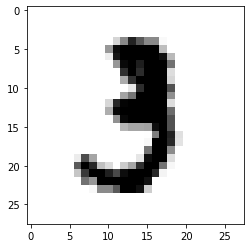

In [23]:
# remapping/reshaping back to 2 dimension and plotting first data point
# to visualize the data point

# changed to observer different digit

plt.imshow(Xtrain[10].reshape(28,28), cmap = plt.cm.binary, interpolation = 'nearest') 
plt.show()

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


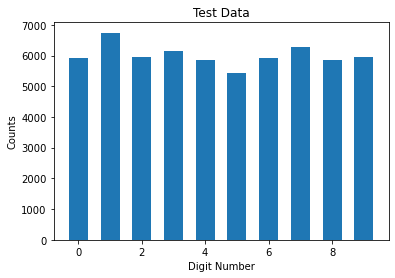

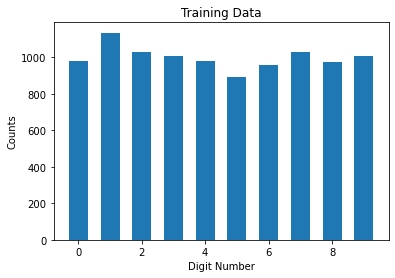

In [24]:
# Get distribution of data labels and plot in bar chart
digit_train, counts_train = np.unique(ytrain, return_counts = True)

distribution_train = dict(zip(digit_train, counts_train))
print(distribution_train )

plt.bar(list(distribution_train.keys()),distribution_train.values(),width =0.6)
plt.title('Test Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()

# display histogram for test data
digit_test, counts_test = np.unique(ytest, return_counts = True)
distribution_test = dict(zip(digit_test , counts_test))
plt.bar(list(distribution_test.keys()),distribution_test.values(),width =0.6)
plt.title('Training Data')
plt.xlabel('Digit Number')
plt.ylabel('Counts')
plt.show()


In [25]:
# splitting the training data into train and test subsets
# test size set to 1/12 proportion of the training data set

X_train, X_val, y_train, y_val  = train_test_split(Xtrain, ytrain, test_size = 1/15, random_state = 42)
print(X_train.shape, X_val.shape)
print(y_train, y_val)

(56000, 784) (4000, 784)
[9 0 7 ... 0 0 4] [7 3 8 ... 2 9 0]


In [26]:
## READ "Implementing MLPs with Keras" on Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow 
#(pages 295-308)

# Network Design 4
# Network with 6 hidden layers using relu activation function and 
# 500 neuron in each layer

from tensorflow.keras.optimizers import SGD

model = keras. models.Sequential()
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(300, activation ="relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


sgd = SGD(learning_rate=0.001)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

X_train = X_train.astype('float32')/255.0
y_train = y_train.astype('uint')
X_val = X_val.astype('float32')/255.0
y_val = y_val.astype('uint')



In [27]:
# training the model using model.fit()

performance = model.fit(X_train, y_train, batch_size=150, epochs=20, validation_data =(X_val,y_val))


Epoch 1/20
374/374 [==============================] - 3s 7ms/step - loss: 2.2908 - accuracy: 0.1601 - val_loss: 2.2796 - val_accuracy: 0.2212
Epoch 2/20
374/374 [==============================] - 2s 7ms/step - loss: 2.2675 - accuracy: 0.2703 - val_loss: 2.2544 - val_accuracy: 0.3025
Epoch 3/20
374/374 [==============================] - 2s 6ms/step - loss: 2.2380 - accuracy: 0.3267 - val_loss: 2.2200 - val_accuracy: 0.3490
Epoch 4/20
374/374 [==============================] - 2s 6ms/step - loss: 2.1951 - accuracy: 0.3819 - val_loss: 2.1670 - val_accuracy: 0.4065
Epoch 5/20
374/374 [==============================] - 2s 6ms/step - loss: 2.1259 - accuracy: 0.4450 - val_loss: 2.0791 - val_accuracy: 0.4692
Epoch 6/20
374/374 [==============================] - 2s 6ms/step - loss: 2.0086 - accuracy: 0.5118 - val_loss: 1.9291 - val_accuracy: 0.5360
Epoch 7/20
374/374 [==============================] - 2s 6ms/step - loss: 1.8131 - accuracy: 0.5850 - val_loss: 1.6883 - val_accuracy: 0.6112
Epoch 

In [28]:
# print a summary of our model and each layer

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_15 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_16 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_17 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_18 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_19 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_20 (Dense)             (None, 10)               

In [29]:
# evaluate model on test data

X_test = Xtest.astype('float32')/255.0
y_test = ytest.astype('uint')


loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f' % acc)
     

Accuracy: 0.891


In [30]:
# generate confusion matrix and classification report
# report shows scores for precision, recall, F1, and support scores of the model

from sklearn.metrics import classification_report, confusion_matrix



y_proba = model.predict(X_test) 
y_pred = np.argmax(y_proba,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_test))
print('Classification Report')
print(classification_report(y_pred, y_test))


Confusion Matrix
[[ 953    0   15    2    1   15   19    4    9    9]
 [   0 1106   10    3    2    2    3   21    5    4]
 [   0    0  879   24    6    8    8   24   13    5]
 [   1    7   21  872    0   50    0    6   28    9]
 [   2    0   21    0  898   11   21   12   12   66]
 [  14    3    5   54    0  732   22    0   60   13]
 [   6    4   25    1   18   25  882    0   16    1]
 [   1    1   12   12    2   10    0  915    9   28]
 [   3   13   39   31    6   29    3    4  804   10]
 [   0    1    5   11   49   10    0   42   18  864]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1027
           1       0.97      0.96      0.97      1156
           2       0.85      0.91      0.88       967
           3       0.86      0.88      0.87       994
           4       0.91      0.86      0.89      1043
           5       0.82      0.81      0.82       903
           6       0.92      0.90      0.91       9

In [31]:
# plotting accuracy vs epochs
performance.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

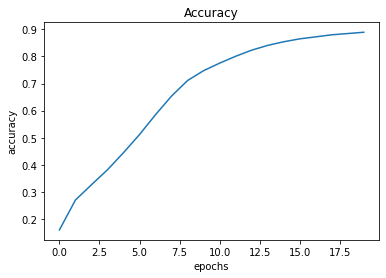

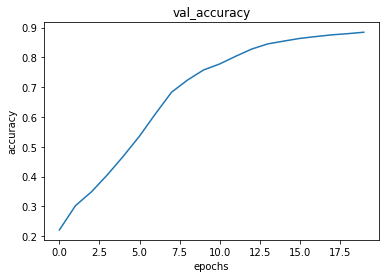

In [32]:
plt.plot(performance.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.plot(performance.history['val_accuracy'])
plt.title('val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

To improve performance of the model, the number of neurons was decreased in each hidden layer. This appears to speed up the performance of the model and improves accuracy with each epoch. However, increasing the batch size and number of epochs doesn't seem to improve the speed at which the model converges to max accuracy. To further improve the mode, maybe more layers and larger batch sizes should be used so the model will converge to max accuracy within fewer epochs. 